# SecureSwipe: Unsupervised/Supervised Anamoly Detection with Skit-learn

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest
# !pip install tensorflow
# !pip install keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers.legacy import Adam ##legacy for mac users
from tensorflow.keras.losses import BinaryCrossentropy



from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Building an Unsupervided Anomaly Detection Algorithm 

In [198]:
# reading the csv data 
df = pd.read_csv('CC_labeled.csv')
ID = df['CUST_ID']
df = df.drop('CUST_ID',axis=1)

# df.fillna(0, inplace=True)


In [199]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [200]:
df.describe() #do somthing with bal/per freqA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [201]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [202]:
df.MINIMUM_PAYMENTS

0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

In [203]:

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

In [43]:
impute.fit(df)
df_imp =impute.transform(df)

df_imputed = pd.DataFrame(df_imp,columns=df.columns)

In [44]:
df_imputed

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,864.206542,0.000000,6.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0


## performing basic EDA (Explorative Data Analysis )

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [9]:
df.fillna(0, inplace=True)


### Feature Engineering on Data

In [10]:
# define a function to engineer new features
def featENG(df):
    
    df['PURCHASES_CREDIT_RATIO'] = df['PURCHASES'] / (df['CREDIT_LIMIT']+ 1e-9)
    df['VALID_PAYMENT'] = (df['PAYMENTS'] > df['MINIMUM_PAYMENTS']).astype(int)
    df['BALANCE_PER_TENURE'] = df['BALANCE'] / (df['TENURE']+ 1e-9)
    df['CREDIT_UTILIZATION'] = df['BALANCE'] / (df['CREDIT_LIMIT']+ 1e-9)
    df['AVG_PURCHASE_AMOUNT'] = df['PURCHASES'] / (df['PURCHASES_TRX'].replace(0, 1))
    df['CASH_ADVANCE_RATIO'] = df['CASH_ADVANCE'] / (df['BALANCE']+ 1e-9)
    df['FULL_PAYMENT_RATIO'] = df['PRC_FULL_PAYMENT'] * df['PURCHASES_FREQUENCY']
    df['PAYMENT_MIN_PAYMENT_RATIO'] = df['PAYMENTS'] / (df['MINIMUM_PAYMENTS'] + 1e-9)
    df['TENURE_IN_MONTHS'] = df['TENURE'] * 12
    df['PURCHASE_SCORE'] = df['ONEOFF_PURCHASES'] + df['INSTALLMENTS_PURCHASES']
    df['TRANS_FREQ_SCORE'] = (df['PURCHASES_FREQUENCY'] + df['CASH_ADVANCE_FREQUENCY']) / 2
    
    
    
    return df


# feature enginering ways 1, grouping 2.
# with mutual info




In [11]:
df = featENG(df) # applying the feature engineering function

## building the model (Isolation Forest)

In [12]:

model = IsolationForest(n_estimators=200).fit(df)

prediction = model.predict(df) # predicts anomalies as -1 and normal points as 1 

prediction
anomaly_score = model.decision_function(df) #returns confidence level of each datapoint being normal. The lower, the more abnormal. 
anomaly_score                


# setting anomalies to 0 and normal to 1

predicted= [0 if x == -1 else 1 for x in prediction]


In [13]:
anomalies_df = df[prediction==-1]
anomalies_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,VALID_PAYMENT,BALANCE_PER_TENURE,CREDIT_UTILIZATION,AVG_PURCHASE_AMOUNT,CASH_ADVANCE_RATIO,FULL_PAYMENT_RATIO,PAYMENT_MIN_PAYMENT_RATIO,TENURE_IN_MONTHS,PURCHASE_SCORE,TRANS_FREQ_SCORE
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,1,52.271734,0.046464,110.797031,0.000000,1.000000,32.081820,144,7091.01,0.500000
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,...,1,530.794276,0.566181,69.129891,0.035957,0.000000,1.251952,144,6359.95,0.666667
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,...,1,316.679281,0.422239,326.796154,2.098447,0.000000,6.649970,144,4248.35,0.666667
30,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,...,1,1011.351663,0.933555,47.468906,0.262321,0.000000,1.285026,144,3038.01,0.750000
39,1411.602230,0.454545,963.24,963.24,0.00,6173.682877,0.083333,0.083333,0.000000,0.333333,...,1,117.633519,0.188214,160.540000,4.373529,0.027778,27.878469,144,963.24,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8928,62.320028,1.000000,500.00,0.00,500.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,1,10.386671,0.062320,83.333333,0.000000,1.000000,6.184871,72,500.00,0.500000
8940,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,...,1,21.806426,0.130839,98.540000,0.000000,1.000000,5.745025,72,591.24,0.500000
8941,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,...,1,994.579212,0.663053,42.910000,1.433673,0.000000,1.120950,72,214.55,0.750000
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,...,0,32.261954,0.048393,506.365000,0.000000,0.000000,0.000000,72,1012.73,0.166666


In [14]:
# prediction by a certain Threshold
threshold  = 0.00 # where 0.00 is the point where the plot goes up incresingly both in frequency and score of normality

anomalies = df[anomaly_score< 0.5] 
anomalies

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,VALID_PAYMENT,BALANCE_PER_TENURE,CREDIT_UTILIZATION,AVG_PURCHASE_AMOUNT,CASH_ADVANCE_RATIO,FULL_PAYMENT_RATIO,PAYMENT_MIN_PAYMENT_RATIO,TENURE_IN_MONTHS,PURCHASE_SCORE,TRANS_FREQ_SCORE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,1,3.408396,0.040901,47.700000,0.000000,0.000000,1.446508e+00,144,95.40,0.083334
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1,266.872285,0.457495,0.000000,2.011869,0.000000,3.826241e+00,144,0.00,0.125000
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,0,207.929072,0.332687,64.430833,0.000000,0.000000,9.916815e-01,144,773.17,0.500000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0,138.889212,0.222223,1499.000000,0.123473,0.000000,0.000000e+00,144,1499.00,0.083333
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,68.142861,0.681429,16.000000,0.000000,0.000000,2.771075e+00,144,16.00,0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,1,4.748919,0.028494,48.520000,0.000000,0.500000,6.660231e+00,72,291.12,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,1,3.197202,0.019183,50.000000,0.000000,0.000000,2.758613e+11,72,300.00,0.500000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,0,3.899779,0.023399,28.880000,0.000000,0.208333,9.860760e-01,72,144.40,0.416666
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0,2.242927,0.026915,0.000000,2.716597,0.000000,9.425050e-01,72,0.00,0.083334


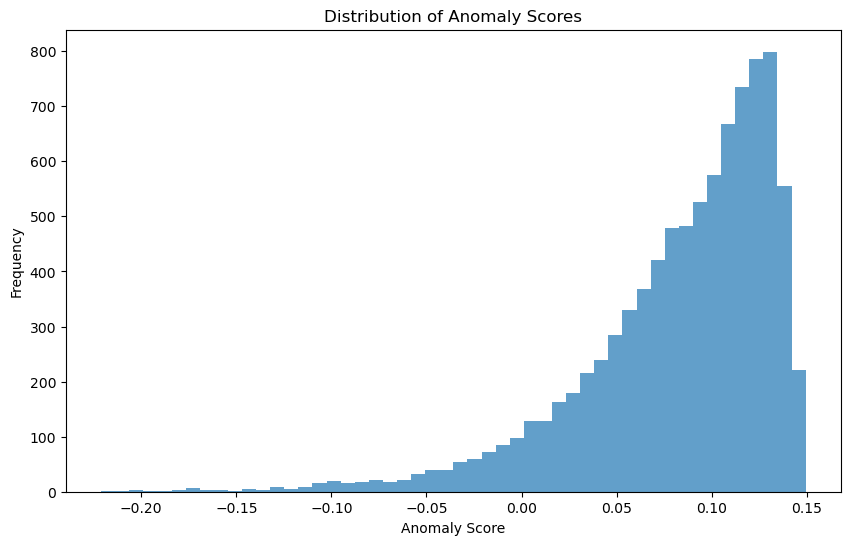

In [15]:
# Plot the distribution of anomaly scores


plt.figure(figsize=(10, 6))
plt.hist(anomaly_score, bins=50, alpha=0.7)


plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


# ------------------------------------------------------------------------------------------ ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------Detecting anomalies from a labled Dataset------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



## Detecting anomalies from a labled Dataset

In [204]:
train_l = pd.read_csv('fraudTrain.csv')
test_l = pd.read_csv('fraudTest.csv')


### feature Engineering

In [205]:
def featENG_(df):
    
    df['lat_long_interaction'] = df['lat'] * df['long']
    df['merch_lat_long_interaction'] = df['merch_lat'] * df['merch_long']
    df_dob = pd.to_datetime(df['dob']).dt.year
    df_trans = pd.to_datetime(df['trans_date_trans_time']).dt.year
    df['is_senior'] = ((df_trans - df_dob)>60).astype(int)
    df['age'] =(df_trans - df_dob)                
    
    return df



In [206]:
columns_to_drop= ['Unnamed: 0', 'trans_date_trans_time', 'dob', 'first', 'last',
                   'gender', 'street', 'city', 'state', 'zip', 'city_pop', 'trans_num']

## due to less processing power

train_l=train_l[:54000]
test_l=test_l[:540000]

train_l = featENG_(train_l)
test_l = featENG_(test_l)

train = train_l.drop(columns_to_drop,axis=1)
test = test_l.drop(columns_to_drop,axis=1)



columtr=train.select_dtypes(include=['object']).columns.tolist()
columte=test.select_dtypes(include=['object']).columns.tolist()

train_encoded=pd.get_dummies(train,columtr,sparse=True).astype(int)
test_encoded=pd.get_dummies(test,columte, sparse=True).astype(int)
y_train = train_encoded['is_fraud']

train,test = train_encoded.drop('is_fraud',axis=1) , test_encoded
# train,test = train_encoded, test_encoded

(54000, 1194) (54000,)


<Axes: >

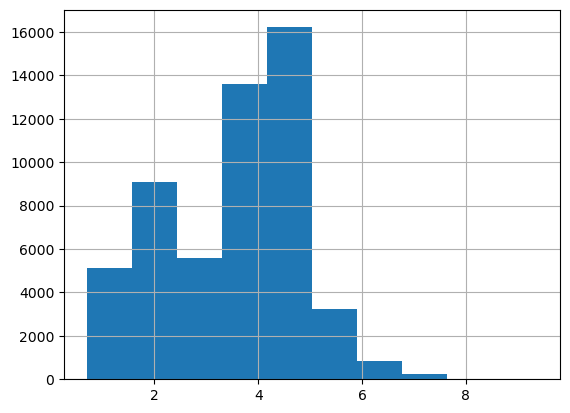

In [207]:
print(train.shape,y_train.shape)
np.log1p(train['amt']).hist()

In [208]:
scaled =StandardScaler().fit_transform(train) 

train_scaled=pd.DataFrame(scaled)

X_train,X_test,y_train,y_test = train_test_split(train_scaled,y_train,test_size=0.2,random_state=42)
# train_norm=pd.DataFrame(df).('is_fraud == 0 ').values[:,:] how ???

train_norm=pd.DataFrame(X_train)[y_train == 0]
train_anam=pd.DataFrame(X_train)[y_train == 1]
test_norm=pd.DataFrame(X_test)[y_test == 0]
test_anam=pd.DataFrame(X_test)[y_test == 1]


### ploting values

In [119]:
## visualizing clusters with t-nse

from sklearn.decomposition import PCA 
from sklearn.manifold import  TSNE

pca_trans = PCA(n_components=2).fit_transform(X_train)
# df_trans=pca.transform(X_train)
tsne_trans = TSNE(n_components=2).fit_transform(X_train)
# df_transt=tsne.transform



/Users/nabilyimer/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:671: RuntimeWarning: overflow encountered in square
  self.explained_variance_ = (S**2) / (n_samples - 1)
/Users/nabilyimer/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/nabilyimer/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:685: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var
/Users/nabilyimer/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:689: RuntimeWarning: invalid value encountered in scalar subtract
  self.noise_variance_ = total_var - xp.sum(self.explained_variance_)
/Users/nabilyimer/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdi

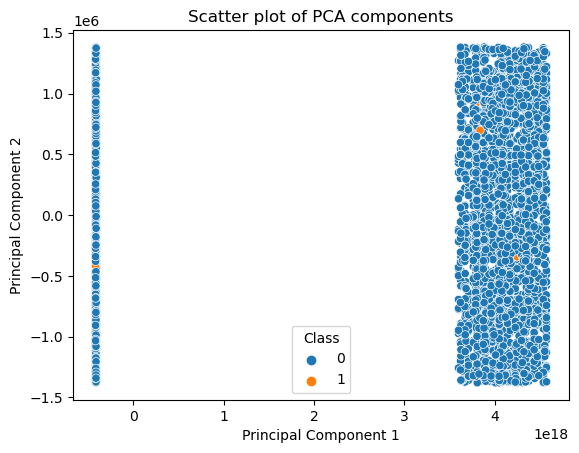

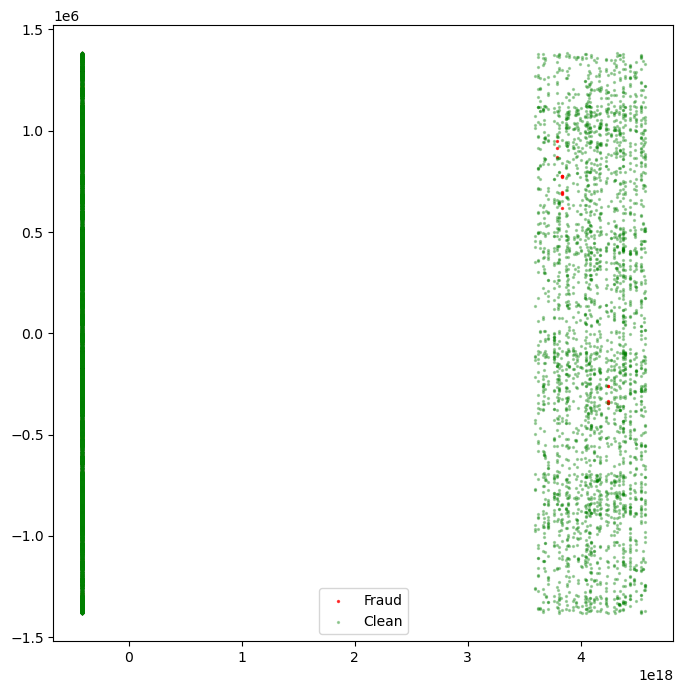

In [125]:


from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you? An alien that can visualise >3d?). Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = PCA(n_components=dimensions, random_state=42).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    # counting dimensions
    if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Fraud'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Clean'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as);
    plt.show


# import seaborn as sns
# sns.scatterplot(x=pca_trans[:,0],y=pca_trans[:,1],hue=y_train)
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pca_trans is a NumPy array containing PCA-transformed data
# Make sure pca_trans is a NumPy array before using it

# Extract the first two principal components
pca_component1 = pca_trans[:, 0]
pca_component2 = pca_trans[:, 1]

# Plot the scatterplot
sns.scatterplot(x=pca_component1, y=pca_component2, hue=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of PCA components')
plt.legend(title='Class')
plt.show()

tsne_scatter(X_train, y_train)

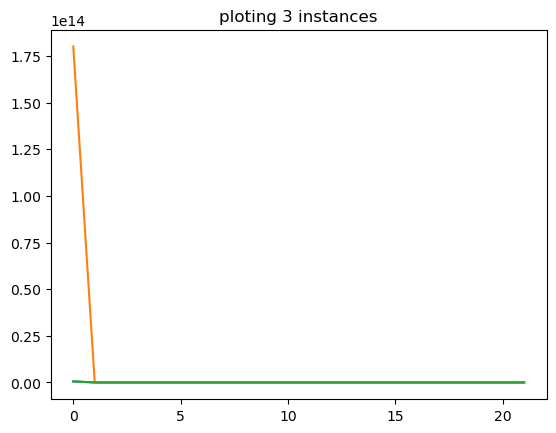

In [24]:
plt.plot(train_norm[0])
plt.plot(train_norm[1])
plt.plot(train_norm[2])

plt.title('ploting 3 instances')
plt.show()

## ANOMALY DETECTION USING AUTOENCODERS


In [8]:
## creating a class

class AutoEncoder(tf.keras.models.Model):
    def __init__(self):
        super(AutoEncoder,self).__init__()
            
        self.encoder = Sequential([
                
                Dense(128,activation='relu'),
                Dense(64,activation='relu'),
                Dense(8,activation='relu'), #10 unit bottle-neck
            ])
                                                    
                                    

        self.decoder = Sequential([
                Dense(64,activation='relu'),
                Dense(128,activation='relu'),
                Dense(train.shape[1],activation='softmax')                  
            ])

    def call(self,X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        
        return decoded
        
        

here we train only the normal data so we the autoencoder only learns on normal so we will have a very low reconstruction loss on our normal data and higher loss on our untrained anomalies .
few things to note:
                   -we set a early Stoper to prevent overfiting
                   -we fit the model twice for the X and Y, but are going to be the same becouse we are training the model to learn reconstructing
                   
                   

In [9]:
## training the model
model = AutoEncoder()
Earlystoper = tf.keras.callbacks.EarlyStopping( monitor='val_loss', patience=0, mode='min')
model.compile(optimizer=Adam(0.001),loss='mae')
history = model.fit(train_norm,train_norm,epochs=50,validation_data=(X_test,X_test),batch_size=120,callbacks=[Earlystoper])

Epoch 1/50
357/357 [==============================] - 1s 3ms/step - loss: 0.0903 - val_loss: 0.0900
Epoch 2/50
357/357 [==============================] - 1s 3ms/step - loss: 0.0899 - val_loss: 0.0900
Epoch 3/50
357/357 [==============================] - 1s 3ms/step - loss: 0.0898 - val_loss: 0.0899
Epoch 4/50
357/357 [==============================] - 1s 3ms/step - loss: 0.0897 - val_loss: 0.0899
Epoch 5/50
357/357 [==============================] - 1s 3ms/step - loss: 0.0897 - val_loss: 0.0899
Epoch 6/50
357/357 [==============================] - 1s 3ms/step - loss: 0.0897 - val_loss: 0.0899
Epoch 7/50
357/357 [==============================] - 1s 3ms/step - loss: 0.0897 - val_loss: 0.0899
Epoch 8/50
357/357 [==============================] - 1s 3ms/step - loss: 0.0897 - val_loss: 0.0899
Epoch 9/50
357/357 [==============================] - 1s 3ms/step - loss: 0.0897 - val_loss: 0.0899
Epoch 10/50
357/357 [==============================] - 1s 3ms/step - loss: 0.0897 - val_loss: 0.0899

1337/1337 [==============================] - 1s 478us/step


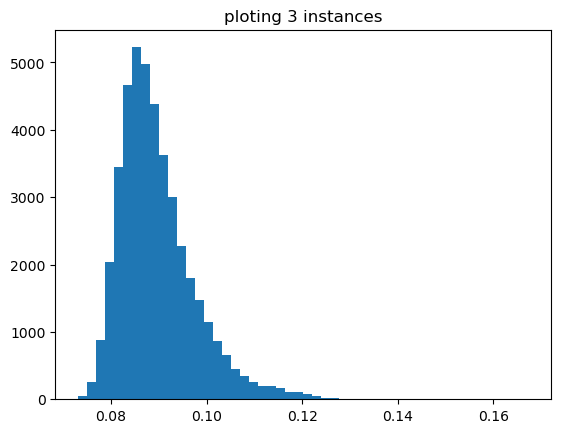

14/14 [==============================] - 0s 599us/step


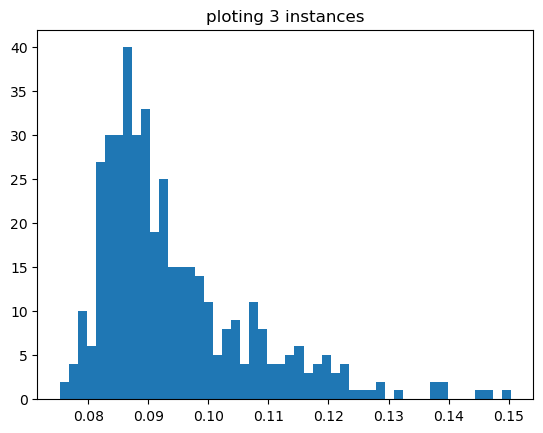

In [10]:
pred_train = model.predict(train_norm)
losses = tf.keras.losses.MAE(pred_train,train_norm)

plt.hist(losses,bins=50)

plt.title('ploting 3 instances')
plt.show()


pred_train = model.predict(train_anam)
losses = tf.keras.losses.MAE(pred_train,train_anam)


plt.hist(losses,bins=50)

plt.title('ploting 3 instances')
plt.show()



In [17]:
# model.decoder(model.encoder(train_norm))


In [ ]:
outliers = np.sum(y_train)/len(y_train)

X_train,X_val,y_train,y_val = train_test_split(train,y_train,test_size=0.2,random_state=42)

In [ ]:
n_estimates = [100,200,300,400,500]
estimates = []
for i in n_estimates:
    model_if = IsolationForest(n_estimators = i,n_jobs=-1).fit(X_train,y_train)
    yhat_val = model_if.predict(X_val)
    estimates.append(roc_auc_score(y_val,yhat_val))

print(estimates)
best_estimator = n_estimates[np.argmax(estimates)]
print('best n_estimator:',best_estimator)

In [ ]:
model_if = IsolationForest(n_estimators =best_estimator ,n_jobs=-1,contamination = outliers).fit(X_train,y_train)
yhat_val = model_if.predict(X_val)
print(roc_auc_score(y_val,yhat_val))

In [ ]:
## evaluated with 0,1
# pred_tr=[0 if tr==-1 else 1 for tr in trainouts]
pred_va=[1 if val==-1 else 0 for val in yhat_val]
print(roc_auc_score(y_val,pred_va))
np.sum(pred_va)

from sklearn.metrics import average_precision_score

ap = average_precision_score(y_val, pred_va)
from sklearn.metrics import precision_score, recall_score, f1_score
y_true,y_pred = y_train,pred_tr
precision = precision_score(y_val, pred_va)
recall = recall_score(y_val, pred_va)
f1 = f1_score(y_val,pred_va )

print(f'averge_p_score {ap}')
print(f'f1 score {f1}')

print(f'prec,recall {precision,recall}')



# ------------------------------------------------------------------------------------------ ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------Detecting anomalies from a labled Dataset------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------ ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------Detecting anomalies from a labled Dataset------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [209]:
train_l = pd.read_csv('fraudTrain.csv')
test_l = pd.read_csv('fraudTest.csv')
train_l=train_l[ :54000]
test_l=test_l[   : 54000]


In [210]:
train_l.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

<Axes: >

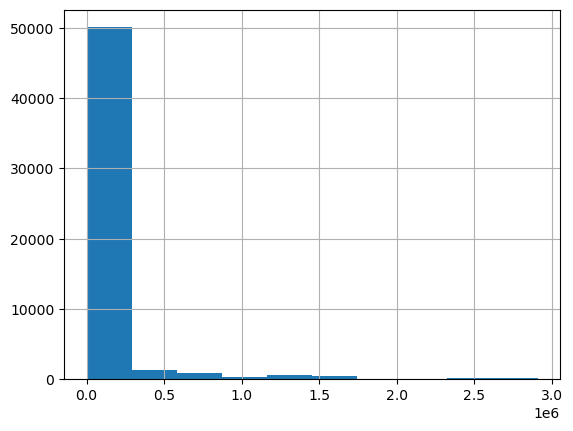

In [211]:
train_l['city_pop'].hist()

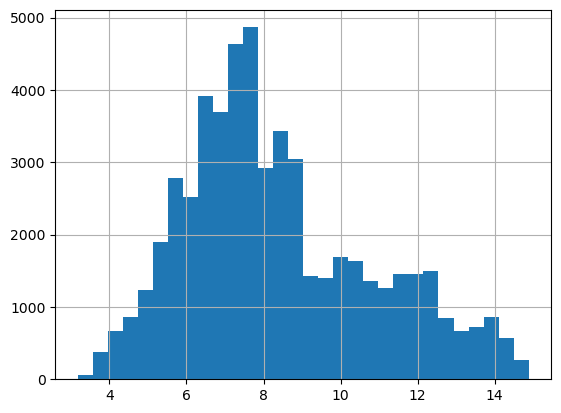

In [212]:
np.log1p(train_l['city_pop']).hist(bins=30)
train_l['city_pop'] = np.log1p(train_l['city_pop'])


In [213]:
train_l.groupby('merchant')['amt'].transform('mean')

0        132.810303
1        112.224340
2         82.878889
3         64.202653
4         64.640323
            ...    
53995     61.878119
53996     53.215325
53997     60.226364
53998     52.296000
53999     49.699200
Name: amt, Length: 54000, dtype: float64

In [214]:
# average amt in the city
train_l['AverageAmt'] = train_l.groupby('city')['amt'].transform('mean')
test_l['AverageAmt'] = test_l.groupby('city')['amt'].transform('mean')

train_l[['city','amt','AverageAmt']]


,city,amt,AverageAmt
0,Moravian Falls,4.97,84.886569
1,Orient,107.23,63.230119
2,Malad City,220.11,60.675455
3,Boulder,45.00,33.724286
4,Doe Hill,41.96,89.672105
...,...,...,...
53995,Scotland,3.47,52.746792
53996,Vacaville,19.83,356.321429
53997,Orient,81.38,63.230119
53998,Rossville,74.49,41.493684


In [215]:
train_l['AverageAmtwithJob'] = train_l.groupby('job')['amt'].transform('mean')
test_l['AverageAmtwithJob'] = test_l.groupby('job')['amt'].transform('mean')

train_l[['job','amt','AverageAmtwithJob']]





,job,amt,AverageAmtwithJob
0,"Psychologist, counselling",4.97,74.624464
1,Special educational needs teacher,107.23,54.347778
2,Nature conservation officer,220.11,60.675455
3,Patent attorney,45.00,44.027453
4,Dance movement psychotherapist,41.96,89.672105
...,...,...,...
53995,Insurance underwriter,3.47,59.689442
53996,Clinical cytogeneticist,19.83,143.238889
53997,Video editor,81.38,63.756575
53998,"Buyer, retail",74.49,41.493684


In [216]:
import csv 


def featENG_(df):
    df['amt_log'] = np.log1p(df['amt'])
    df.drop(['amt','cc_num','unix_time'],axis=1,inplace=True)
    df['lat_long_interaction'] = df['lat'] * df['long']
    df['merch_lat_long_interaction'] = df['merch_lat'] * df['merch_long']
    df_dob = pd.to_datetime(df['dob']).dt.year
    df_trans = pd.to_datetime(df['trans_date_trans_time']).dt.year
    df['is_senior'] = ((df_trans - df_dob)>60).astype(int)
    df['age'] =(df_trans - df_dob)                
    
    return df


# Testing & Predicting with is forest 

In [217]:
# train_l = pd.read_csv('fraudTrain.csv')
# test_l = pd.read_csv('fraudTest.csv')
# train_l=train_l[ :54000]
# test_l=test_l[   : 54000]

train_l=featENG_(train_l)
columns_to_drop= [
    'Unnamed: 0', 'trans_date_trans_time', 'dob', 'first', 'last','lat','long','merch_lat','merch_long',
     'street' ,'category' ,'merchant' , 'city' , 'state', 'zip','job', 'city_pop', 'trans_num']


# train_l = featENG_(train_l)
# test_l = featENG_(test_l)

train = train_l.drop(columns_to_drop,axis=1)
test = test_l.drop(columns_to_drop,axis=1)



columtr=train.select_dtypes(include=['object']).columns.tolist()
columte=test.select_dtypes(include=['object']).columns.tolist()

train_encoded=pd.get_dummies(train,columtr,sparse=True).astype(int)
test_encoded=pd.get_dummies(test,columte, sparse=True).astype(int)

ytrain = train_l['is_fraud']
train_encoded.drop('is_fraud',axis=1,inplace=True)

# train,test = train_encoded.drop('is_fraud',axis=1) , test_encoded

train,test = train_encoded, test_encoded


In [227]:
train

,AverageAmt,AverageAmtwithJob,amt_log,lat_long_interaction,merch_lat_long_interaction,is_senior,age,gender_F,gender_M
0,84,74,1,-2928,-2954,0,31,1,0
1,63,54,4,-5779,-5809,0,41,1,0
2,60,60,5,-4735,-4839,0,57,0,1
3,33,44,3,-5183,-5294,0,52,0,1
4,89,89,3,-3053,-3041,0,33,0,1
...,...,...,...,...,...,...,...,...,...
53995,52,59,1,-2907,-2944,0,43,1,0
53996,356,143,3,-4682,-4685,0,49,0,1
53997,63,63,4,-2974,-3065,0,51,0,1
53998,41,41,4,-3538,-3560,0,44,1,0


In [149]:

# lets do feature enginearing in depth
# first lets try Mutual info to see which is 
#  more important.  mutual_info_classifier
# then lets try to put the distances ads features of kmeans or pca

# TODO


In [228]:
from sklearn.neighbors import KNeighborsClassifier

X_train,X_val,y_train,y_val = train_test_split(train, ytrain , test_size=0.4 , random_state=42)

model_if = IsolationForest(n_estimators=300).fit(X_train)

model_knn = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)





score = model_if.decision_function(X_train)
score_val_if = model_if.decision_function(X_val)

# distance, _= model_knn.fit([X_val])
score_val_knn= model_knn.predict(X_val)


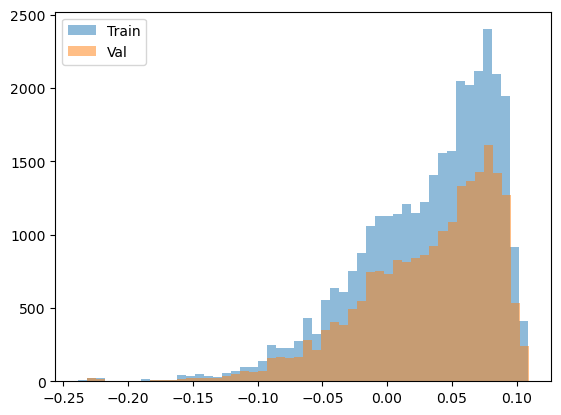

In [229]:
plt.hist(score, bins= 50 , alpha=.5, label='Train')
plt.hist(score_val_if,bins=50 , alpha=.5, label = 'Val')
plt.legend()
plt.show()

In [230]:
threshold=-0.10
threshold_val= - 0.10


yhat = [0 if x > threshold else 1 for x in score]

yhat_val = [0 if x > threshold_val else 1 for x in score_val_if]

print(classification_report(yhat, y_train))
print(classification_report(yhat_val, y_val))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     31804
           1       0.30      0.16      0.21       596

    accuracy                           0.98     32400
   macro avg       0.64      0.58      0.60     32400
weighted avg       0.97      0.98      0.97     32400

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     21202
           1       0.31      0.17      0.22       398

    accuracy                           0.98     21600
   macro avg       0.65      0.58      0.60     21600
weighted avg       0.97      0.98      0.97     21600



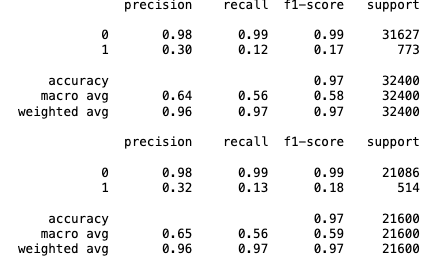

In [231]:
# param_grid = {
#     'n_estimators': [50, 100, 200, 300],  # Number of trees
#     'max_samples': [0.5, 0.75, 1.0],       # Proportion of samples used for each tree
#     'max_features': [0.5, 0.75, 1.0],      # Proportion of features used for each split
#     'contamination': [0.01, 0.05, 0.1],    # Expected proportion of outliers
#     'bootstrap': [True, False],            # Whether bootstrap samples are used
#     'random_state': [42]                   # Random state for reproducibility
# }

# from sklearn.model_selection import RandomizedSearchCV

# # 
# model_x=RandomizedSearchCV(IsolationForest(),param_distributions=param_grid,n_iter=100,scoring ='f1',random_state=42,cv=5).fit(X_train,y_train)

# best_params  = model_x.best_params_


In [232]:
best_params

{'random_state': 42,
 'n_estimators': 100,
 'max_samples': 1.0,
 'max_features': 0.75,
 'contamination': 0.1,
 'bootstrap': False}

In [233]:
# print('best_params:',best_params)
best_params= {'random_state': 42, 'n_estimators': 100, 'max_samples': 1.0, 'max_features': 0.75, 'contamination': 0.1, 'bootstrap': False}

model_if = IsolationForest(**best_params).fit(X_train)





score = model_if.decision_function(X_train)
score_val_if = model_if.decision_function(X_val)



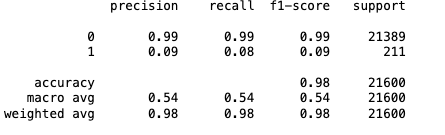

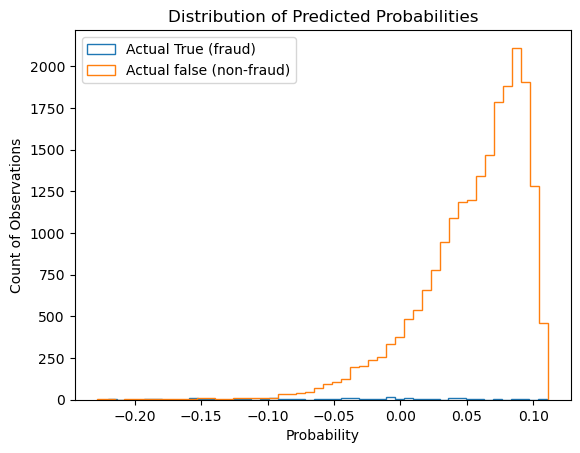

In [234]:
y_score=score_val_if


actual_pos = y_score[y_val==1]
actual_neg = y_score[y_val==0]

plt.hist(actual_pos, bins=50,label = 'Actual True (fraud)',density=False, histtype='step')
plt.hist(actual_neg,bins=50,label = 'Actual false (non-fraud)', density=False, histtype='step')


plt.xlabel('Probability')

plt.ylabel('Count of Observations')
plt.title('Distribution of Predicted Probabilities')

plt.legend()
plt.show()

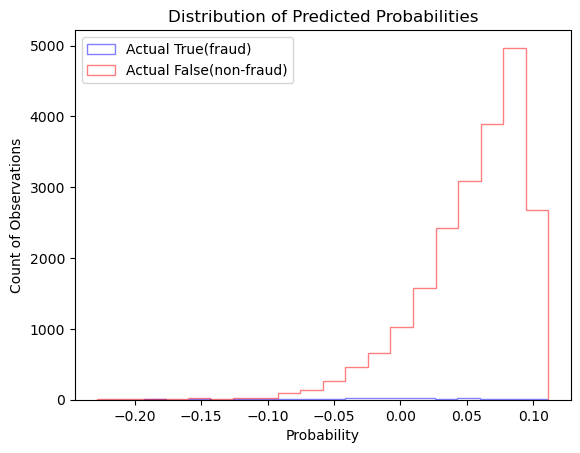

In [235]:

y_scores = score_val_if
y_true = y_val

positive_scores = y_scores[y_true == 1]
negative_scores = y_scores[y_true == 0]

plt.hist(positive_scores, bins=20, alpha=0.5, color='blue', label='Actual True(fraud)', density=False, histtype='step')
plt.hist(negative_scores, bins=20, alpha=0.5, color='red', label='Actual False(non-fraud)', density=False, histtype='step')


plt.xlabel('Probability')

plt.ylabel('Count of Observations')
plt.title('Distribution of Predicted Probabilities')
plt.legend()

# Show plot
plt.show()

In [236]:

threshold = -0.10

y_hat = [0 if x > threshold else 1 for x in score_val_if]


from sklearn.metrics import classification_report,roc_auc_score
print(roc_auc_score(y_val,y_hat))
print(classification_report(y_val,y_hat))

0.5804137264160455
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21389
           1       0.24      0.17      0.20       211

    accuracy                           0.99     21600
   macro avg       0.62      0.58      0.60     21600
weighted avg       0.98      0.99      0.99     21600



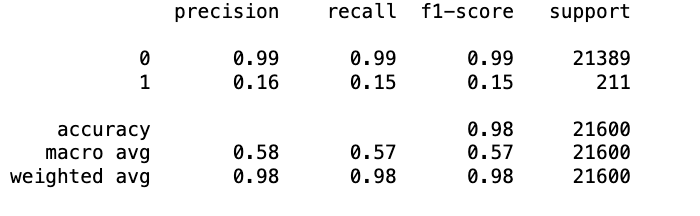
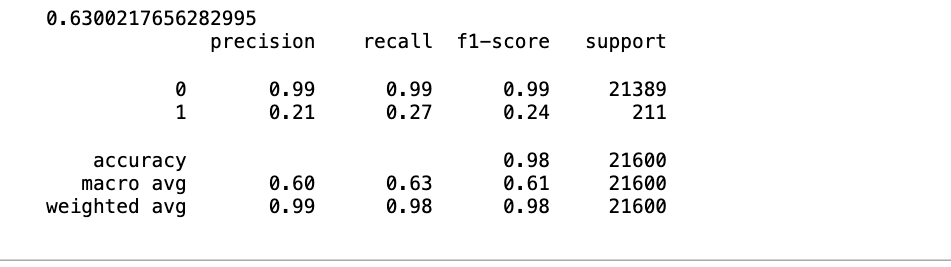

In [237]:

threshold = 0.19

y_hat = [0 if x > threshold else 1 for x in score_val_knn]


from sklearn.metrics import classification_report
print(classification_report(y_val,score_val_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     21389
           1       0.47      0.08      0.14       211

    accuracy                           0.99     21600
   macro avg       0.73      0.54      0.57     21600
weighted avg       0.99      0.99      0.99     21600



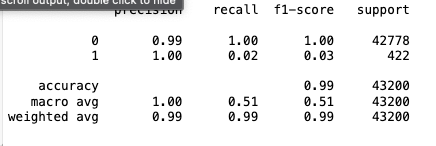

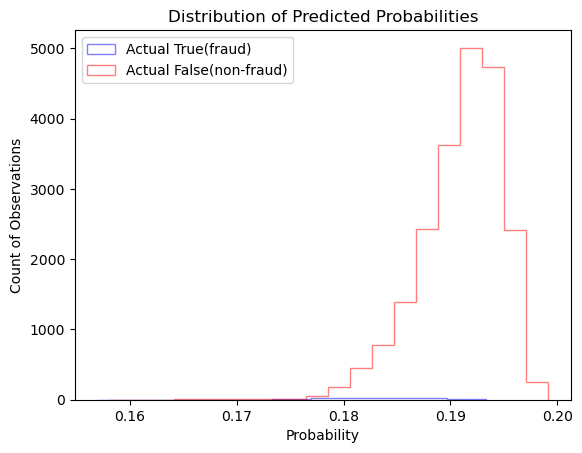

In [192]:
score_val_if

array([-0.03508132,  0.06099935,  0.05765469, ...,  0.03593337,
        0.10500616,  0.07439444])

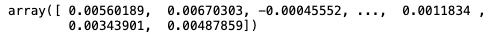

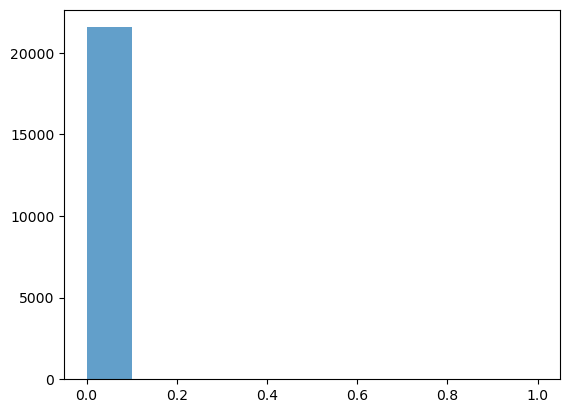

In [193]:
# Plot the distribution of anomaly scores


# plt.figure(figsize=(10, 6))
plt.hist(score_val_knn, alpha=0.7)


# plt.title('Distribution of Anomaly Scores')
# plt.xlabel('Anomaly Score')
# plt.ylabel('Frequency')
plt.show()

In [238]:

threshold = 0.00185

y_hat = [0 if x > threshold else 1 for x in score_val_if]


from sklearn.metrics import classification_report
print(classification_report(y_val,y_hat))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94     21389
           1       0.06      0.64      0.10       211

    accuracy                           0.89     21600
   macro avg       0.53      0.77      0.52     21600
weighted avg       0.99      0.89      0.94     21600



In [47]:
from sklearn.metrics import f1_score
probability=score_val_if
scores=[]

for i in range(len(probability)):
    y_hat = [0 if x > threshold else 1 for x in score_val_if]
    scores.append(f1_score(y_val,y_hat))
    

KeyboardInterrupt: 

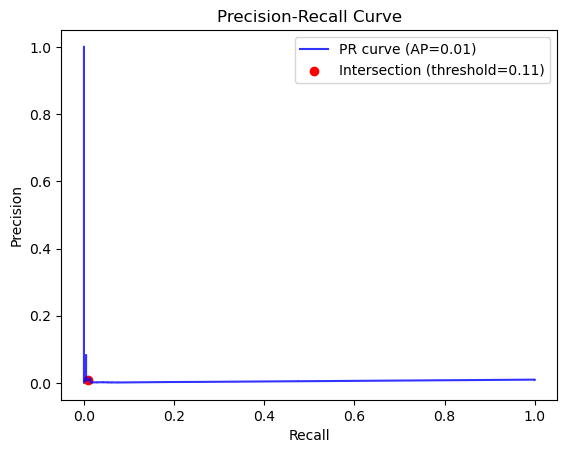

In [242]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Example predicted probabilities and true labels
y_scores = score_val_if  # Replace with actual predicted probabilities
y_true = y_val # Replace with actual true labels (0s and 1s)

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Compute area under the precision-recall curve
average_precision = average_precision_score(y_true, y_scores)

# Plot precision-recall curve
plt.plot(recall, precision, color='b', alpha=0.8, label=f'PR curve (AP={average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

# Find the threshold where precision and recall intersect
intersection_threshold = thresholds[np.argmax(precision >= recall)]

# Highlight the threshold point
plt.scatter(recall[np.argmax(precision >= recall)], precision[np.argmax(precision >= recall)], color='r', label=f'Intersection (threshold={intersection_threshold:.2f})')
plt.legend()

# Show plot
plt.show()


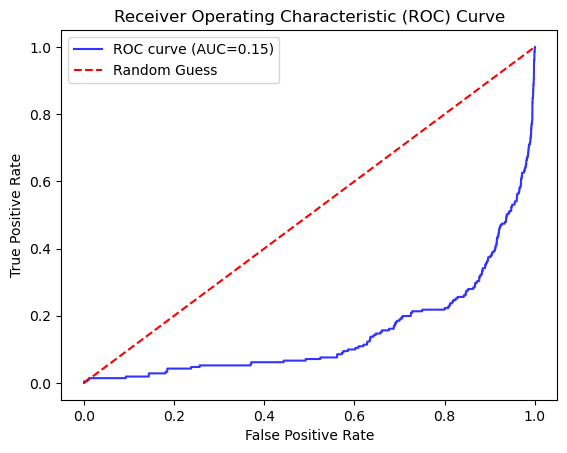

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Example predicted probabilities and true labels
# y_scores = np.random.rand(1000)  # Replace with actual predicted probabilities
# y_true = np.random.randint(2, size=1000)  # Replace with actual true labels (0s and 1s)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute Area Under the Curve (AUC)
auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', alpha=0.8, label=f'ROC curve (AUC={auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show plot
plt.show()


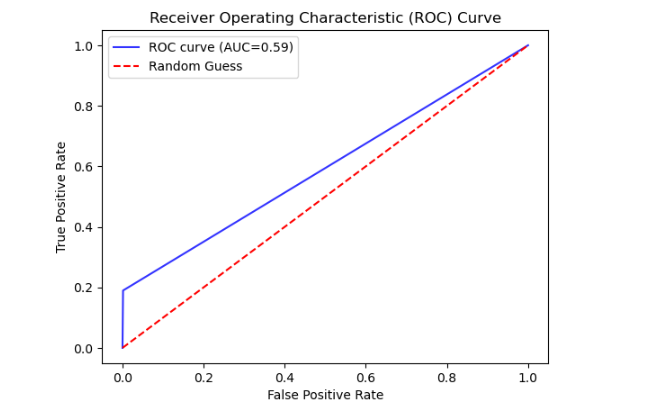
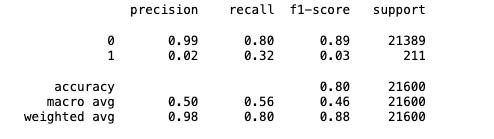
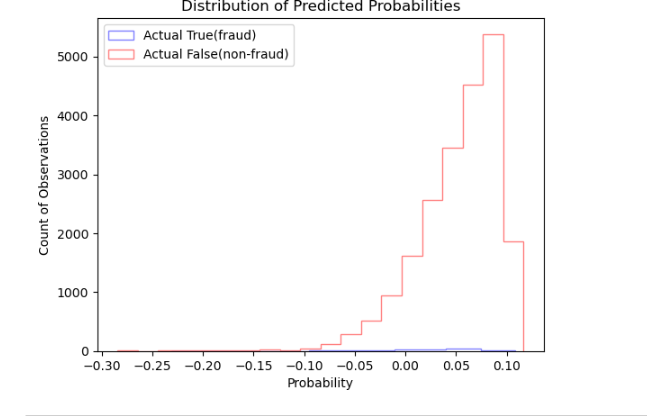
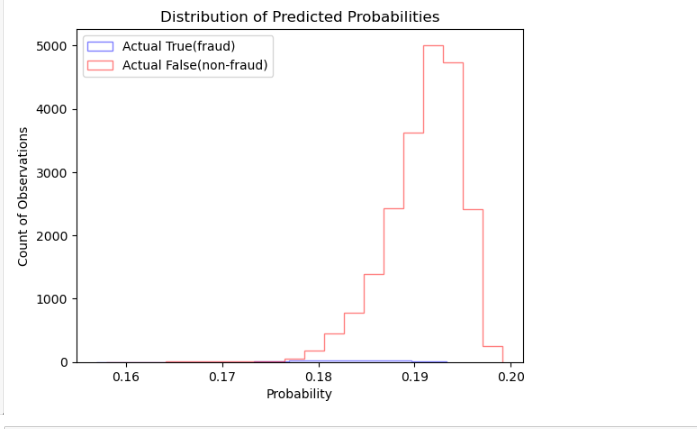